In [ ]:
## Question 1-a

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dfData = pd.read_table("ml-100k/u.data", sep = '\t')

In [3]:
dfData.columns = ['user', 'item', 'rating', 'ts']

In [4]:
dfData.shape

(99999, 4)

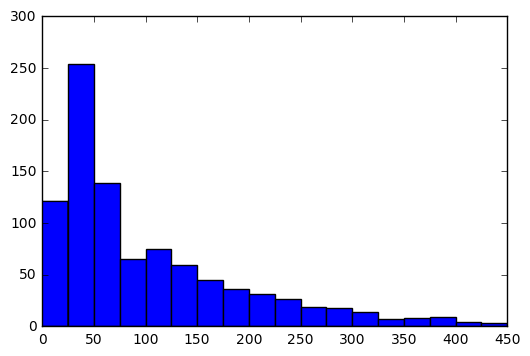

In [5]:
# Aggregating count(Users) by item, and count(items) by user 
dfItemUserCount = pd.DataFrame({'count': dfData.groupby('item').size()}).reset_index()

dfUserItemCount = pd.DataFrame({'count': dfData.groupby('user').size()}).reset_index()



matHist1 = dfItemUserCount.as_matrix()
matHist2 = dfUserItemCount.as_matrix()

#print(matHist1[:,1])

#dfItemUserCount.head(10)

plt.hist(matHist1[:,1], bins = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450])
plt.show()

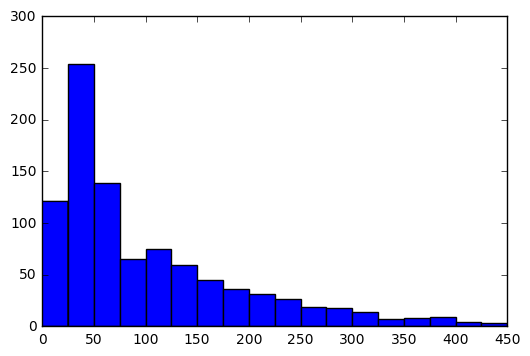

In [10]:
plt.hist(matHist2[:,1], bins = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450])
plt.show()

In [6]:
dfData = pd.read_table("ml-100k/ua.base", sep = '\t')
dfData.columns = ['user', 'item', 'rating', 'ts']
dfData.shape

dfItemUserCount = pd.DataFrame({'count': dfData.groupby('item').size()}).reset_index()
dfUserItemCount = pd.DataFrame({'count': dfData.groupby('user').size()}).reset_index()

#print(dfItemUserCount['item'].value_counts)

In [ ]:
# calculating mu
print(dfData['rating'].sum() / 99999)

In [7]:
# calculating bi for each item using mu = 3.5299


listbi = [0]*1682


for i in list(dfItemUserCount['item']):
    Nr = 0
    itemUserCnt = len(dfData.loc[(dfData['item'] == i)].index)
    Dr = 25 + len(dfData.loc[(dfData['item'] == i)].index)
    for j in list(dfUserItemCount['user']):
        tempNr = 0
        k = len(dfData[(dfData['item'] == i) & (dfData['user'] == j)]['rating'].index)
        
        if(k >= 1):
            tempNr = dfData.loc[(dfData['item'] == i) & (dfData['user'] == j)]['rating'].values[0] - 3.5299
            #tempNr = float(dfData[(dfData['item'] == i) & (dfData['user'] == j)]['rating']) - 3.5299
            Nr = Nr + tempNr
    listbi[i-1] = Nr / Dr
    print(i-1)
    
        

    
#print(sumItemRtg[0])

#print(sum(avgItemRtg) / len(avgItemRtg))

#print(avgItemRtg)


#print(testList)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [255]:
len(listbu)

943

In [9]:
# calculating bu for each user, using mu = 3.5299

listbu = [0]*943


for j in list(dfUserItemCount['user']):
    Nr = 0
    itemUserCnt = len(dfData.loc[(dfData['user'] == j)].index)
    Dr = 10 + len(dfData.loc[(dfData['user'] == j)].index)
    for i in list(dfItemUserCount['item']):
        tempNr = 0
        k = len(dfData[(dfData['item'] == i) & (dfData['user'] == j)]['rating'].index)
        
        if(k >= 1):
            tempNr = dfData.loc[(dfData['item'] == i) & (dfData['user'] == j)]['rating'].values[0] - 3.5299 - listbi[i-1]
            #tempNr = float(dfData[(dfData['item'] == i) & (dfData['user'] == j)]['rating']) - 3.5299
            Nr = Nr + tempNr
    listbu[j-1] = Nr / Dr
    print(j-1)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [8]:
# backing up list of bi in local file

thefile = open('bi_2000.txt', 'w')
cnt = 0
for item in listbi:
    cnt += 1
    thefile.write("%s\n" % item)
    

In [256]:
# backing up list of bu in local file

thefile = open('bu_2100.txt', 'w')
cnt = 0
for item in listbu:
    cnt += 1
    thefile.write("%s\n" % item)

In [69]:
cntRtg = 0
sumRtg = 0
for x in np.nditer(mxData):
    if(x != 0): 
        cntRtg = cntRtg + 1
        sumRtg = sumRtg + x
print(sumRtg)
print(cntRtg)        

88352093051946
399996


In [176]:
#Average RMSE - training data
listTui = [0]*9429


dfDataTest = pd.read_table("ml-100k/ua.test", sep = '\t')
dfDataTest.columns = ['user', 'item', 'rating', 'ts']
dfDataTest['rating'].head()

nrRMSE = 0

for index, row in dfDataTest.iterrows():
    tempu = row['user']
    tempi = row['item']
    tempRui = row['rating']
    tempTui = 3.5299 + listbi[tempi - 1] + listbu[tempu - 1]
    tempNr = (tempRui - tempTui)**2
    nrRMSE += tempNr


In [198]:
(nrRMSE / 9429)**0.5



0.96654438378292218

In [197]:
### Finding the average rating for each user - from training data
listAvgUserRtg = [0]*943
listUserRtgBkt = [0]*943

for tempUser in list(dfDataTest['user']):
    listAvgUserRtg[int(tempUser) - 1] = dfData[(dfData['user'] == tempUser)]['rating'].sum() / len(dfData.loc[(dfData['user'] == tempUser)].index)
    listUserRtgBkt[int(tempUser) - 1] = round(listAvgUserRtg[int(tempUser) - 1],0)




In [224]:
### Finding the RMSE for each user

listTestTui = [0]*943


nrTestRMSE = 0

#
listUserBkt1 = []
listUserBkt2 = []
listUserBkt3 = []
listUserBkt4 = []
listUserBkt5 = []

for i in range(0,len(listUserRtgBkt)-1):
    if (listUserRtgBkt[i] == 1): 
        listUserBkt1.append(i+1)
    if (listUserRtgBkt[i] == 2): 
        listUserBkt2.append(i+1)
    if (listUserRtgBkt[i] == 3): 
        listUserBkt3.append(i+1)
    if (listUserRtgBkt[i] == 4): 
        listUserBkt4.append(i+1)
    if (listUserRtgBkt[i] == 5): 
        listUserBkt5.append(i+1)

dfDataTestBkt1 = dfDataTest[dfDataTest['user'].isin(listUserBkt1)]
dfDataTestBkt2 = dfDataTest[dfDataTest['user'].isin(listUserBkt2)]
dfDataTestBkt3 = dfDataTest[dfDataTest['user'].isin(listUserBkt3)]
dfDataTestBkt4 = dfDataTest[dfDataTest['user'].isin(listUserBkt4)]
dfDataTestBkt5 = dfDataTest[dfDataTest['user'].isin(listUserBkt5)]





In [239]:
nrRMSE1 = 0
nrRMSE2 = 0
nrRMSE3 = 0
nrRMSE4 = 0
nrRMSE5 = 0

for index, row in dfDataTestBkt1.iterrows():
    tempu = row['user']
    tempi = row['item']
    tempRui = row['rating']
    tempTui = 3.5299 + listbi[tempi - 1] + listbu[tempu - 1]
    tempNr = (tempRui - tempTui)**2
    nrRMSE1 += tempNr
    
for index, row in dfDataTestBkt2.iterrows():
    tempu = row['user']
    tempi = row['item']
    tempRui = row['rating']
    tempTui = 3.5299 + listbi[tempi - 1] + listbu[tempu - 1]
    tempNr = (tempRui - tempTui)**2
    nrRMSE2 += tempNr
    
for index, row in dfDataTestBkt3.iterrows():
    tempu = row['user']
    tempi = row['item']
    tempRui = row['rating']
    tempTui = 3.5299 + listbi[tempi - 1] + listbu[tempu - 1]
    tempNr = (tempRui - tempTui)**2
    nrRMSE3 += tempNr
    
for index, row in dfDataTestBkt4.iterrows():
    tempu = row['user']
    tempi = row['item']
    tempRui = row['rating']
    tempTui = 3.5299 + listbi[tempi - 1] + listbu[tempu - 1]
    tempNr = (tempRui - tempTui)**2
    nrRMSE4 += tempNr
    
for index, row in dfDataTestBkt5.iterrows():
    tempu = row['user']
    tempi = row['item']
    tempRui = row['rating']
    tempTui = 3.5299 + listbi[tempi - 1] + listbu[tempu - 1]
    tempNr = (tempRui - tempTui)**2
    nrRMSE5 += tempNr

In [254]:
#(nrRMSE5 / len(dfDataTestBkt5))**0.5

print(dfDataTestBkt5)

      user  item  rating         ts
1169   118   156       5  875384946
1170   118   174       5  875385007
1171   118   176       5  875384793
1172   118   200       5  875384647
1173   118   324       4  875384444
1174   118   433       5  875384793
1175   118   475       5  875384793
1176   118   547       5  875385228
1177   118   654       5  875385007
1178   118   774       5  875385198
2239   225    64       4  879539727
2240   225   136       5  879540707
2241   225   143       2  879540748
2242   225   172       5  879540748
2243   225   193       4  879539727
2244   225   237       5  879539643
2245   225   418       5  879540650
2246   225   480       5  879540748
2247   225   492       4  879539767
2248   225  1443       4  879540778
2509   252     7       4  891455743
2510   252     9       5  891456797
2511   252   100       5  891456797
2512   252   129       4  891456876
2513   252   268       5  891455329
2514   252   275       5  891456464
2515   252   277       4  89

In [216]:
#len(dfData.loc[(dfData['user'] == 1)].index)
#dfData[(dfData['user'] == 1)]['rating'].sum()

#round(3.49999999,0)

#enumerate(["foo", "bar", "bar"])

len(listUserBkt5) + len(listUserBkt4) + len(listUserBkt3) + len(listUserBkt2) + len(listUserBkt1)

for tempUser in listUserBkt1
    
    dfDataTest = dfDataTest[dfDataTest['user'] == tempUser]['user']
    tempi = row['item']
    tempRui = row['rating']
    tempTui = 3.5299 + listbi[tempi - 1] + listbu[tempu - 1]
    tempNr = (tempRui - tempTui)**2
    nrRMSE += tempNr

942